# 04 - Análise dos Resultados do Benchmark

Este notebook analisa os resultados gerados pelo benchmark executado em `03_full_benchmark.ipynb`.

## Objetivos
1. Carregar resultados dos experimentos
2. Gerar relatório consolidado
3. Comparar modelos e estratégias
4. Visualizar resultados
5. Extrair conclusões

In [1]:
# Configurar path do projeto
import sys
from pathlib import Path
from loguru import logger

project_root = Path().resolve().parent
sys.path.insert(0, str(project_root / "src"))

# Configurar logger
logger.remove()
logger.add(sys.stderr, level="INFO")
logger.add(project_root / "reports/logs/04_benchmark_analysis.log", rotation="10 MB")

logger.info(f"Project root: {project_root}")

2026-01-26 14:51:08.473 | INFO     | __main__:<module>:14 - Project root: /Users/joaoroldi/Projects/tcc2


In [2]:
# Imports
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Módulos do projeto
from config import PATHS
from models.metrics import generate_report

logger.info("✅ Imports concluídos")

2026-01-26 14:51:10.157 | INFO     | __main__:<module>:11 - ✅ Imports concluídos


## 1. Carregar Resultados

In [3]:
# Carregar todos os resultados dos arquivos JSON
results_dir = Path(PATHS['results_dir'])
all_results = []

logger.info(f"Carregando resultados de: {results_dir}")

for file in results_dir.glob('*.json'):
    try:
        with open(file, 'r') as f:
            result = json.load(f)
            if 'error' not in result:
                all_results.append(result)
    except (json.JSONDecodeError, Exception) as e:
        logger.warning(f"Erro ao carregar {file}: {e}")

logger.info(f"✅ {len(all_results)} resultados carregados com sucesso")

2026-01-26 14:51:10.166 | INFO     | __main__:<module>:5 - Carregando resultados de: /Users/joaoroldi/Projects/tcc2/reports
2026-01-26 14:51:10.175 | INFO     | __main__:<module>:16 - ✅ 31 resultados carregados com sucesso


## 2. Gerar Relatório Consolidado

In [4]:
# Gerar relatório
df_report = generate_report(all_results, results_dir)

2026-01-26 14:51:10.285 | INFO     | models.metrics:generate_markdown_report:227 - Relatório Markdown salvos em: /Users/joaoroldi/Projects/tcc2/reports/benchmark_report.md
2026-01-26 14:51:10.286 | INFO     | models.metrics:generate_report:131 - RELATÓRIO CONSOLIDADO
2026-01-26 14:51:10.289 | INFO     | models.metrics:generate_report:132 - 
                                model         strategy     dataset  accuracy  precision  recall  f1_score  avg_inference_time  vram_usage_gb  invalid_rate error
               Qwen/Qwen2-7B-Instruct         few_shot      fakebr     0.361   0.098266   0.034  0.050520            1.423176            2.0         0.000  None
               Qwen/Qwen2-7B-Instruct        zero_shot fakerecogna     0.788   0.918605   0.632  0.748815            0.619561            2.0         0.000  None
                 maritaca-ai/sabia-7b        zero_shot      fakebr     0.193   0.265649   0.348  0.301299            2.719206            2.0         0.444  None
  meta-llama/

In [5]:
df_report.sort_values('f1_score', ascending=False)

,model,strategy,dataset,accuracy,precision,recall,f1_score,avg_inference_time,vram_usage_gb,invalid_rate,error
5,neuralmind/bert-base-portuguese-cased,fine_tuned,fakebr,0.998,0.998000,0.998,0.998000,0.028966,NaN,0.000,None
23,meta-llama/Meta-Llama-3-8B-Instruct,few_shot,fakerecogna,0.867,0.852207,0.888,0.869736,0.711878,2.0,0.000,None
8,Qwen/Qwen2-7B-Instruct,few_shot,fakerecogna,0.837,0.882086,0.778,0.826780,0.659771,2.0,0.000,None
3,meta-llama/Meta-Llama-3-8B-Instruct,chain_of_thought,fakerecogna,0.745,0.713787,0.818,0.762349,4.394519,2.0,0.000,None
14,Qwen/Qwen2-7B-Instruct,chain_of_thought,fakerecogna,0.697,0.637378,0.914,0.751027,3.219178,2.0,0.001,None
1,Qwen/Qwen2-7B-Instruct,zero_shot,fakerecogna,0.788,0.918605,0.632,0.748815,0.619561,2.0,0.000,None
21,CEIA-UFG/Gemma-3-Gaia-PT-BR-4b-it,chain_of_thought,fakerecogna,0.677,0.636364,0.826,0.718886,3.876999,2.0,0.000,None
4,meta-llama/Meta-Llama-3-8B-Instruct,zero_shot,fakerecogna,0.759,0.927393,0.562,0.699875,0.710726,2.0,0.000,None
16,Qwen/Qwen2-1.5B-Instruct,few_shot,fakerecogna,0.531,0.516230,0.986,0.677663,16.240840,0.0,0.000,None
26,CEIA-UFG/Gemma-3-Gaia-PT-BR-4b-it,zero_shot,fakerecogna,0.724,0.959016,0.468,0.629032,14.961662,2.0,0.000,None


## 3. Análise dos Resultados

In [6]:
# Melhor modelo por F1-Score
best_idx = df_report['f1_score'].idxmax()
best = df_report.loc[best_idx]

logger.info("🏆 MELHOR RESULTADO")
logger.info(f"Modelo: {best['model']}")
logger.info(f"Estratégia: {best['strategy']}")
logger.info(f"Dataset: {best['dataset']}")
logger.info(f"F1-Score: {best['f1_score']:.4f}")
logger.info(f"Acurácia: {best['accuracy']:.4f}")
logger.info(f"Tempo médio: {best['avg_inference_time']:.2f}s")

2026-01-26 14:51:10.316 | INFO     | __main__:<module>:5 - 🏆 MELHOR RESULTADO
2026-01-26 14:51:10.316 | INFO     | __main__:<module>:6 - Modelo: neuralmind/bert-base-portuguese-cased
2026-01-26 14:51:10.317 | INFO     | __main__:<module>:7 - Estratégia: fine_tuned
2026-01-26 14:51:10.317 | INFO     | __main__:<module>:8 - Dataset: fakebr
2026-01-26 14:51:10.317 | INFO     | __main__:<module>:9 - F1-Score: 0.9980
2026-01-26 14:51:10.318 | INFO     | __main__:<module>:10 - Acurácia: 0.9980
2026-01-26 14:51:10.318 | INFO     | __main__:<module>:11 - Tempo médio: 0.03s


In [7]:
# Comparação por estratégia
strategy_comparison = df_report.groupby('strategy')[['accuracy', 'precision', 'recall', 'f1_score']].mean()
strategy_comparison.sort_values('f1_score', ascending=False)

,accuracy,precision,recall,f1_score
strategy,,,,
fine_tuned,0.9980,0.998000,0.9980,0.998000
zero_shot,0.5077,0.505190,0.4284,0.438963
chain_of_thought,0.4316,0.409603,0.4724,0.433959
few_shot,0.5387,0.506772,0.4204,0.409852


In [8]:
# Comparação por modelo
model_comparison = df_report.groupby('model')[['accuracy', 'precision', 'recall', 'f1_score']].mean()
model_comparison.sort_values('f1_score', ascending=False)

,accuracy,precision,recall,f1_score
model,,,,
neuralmind/bert-base-portuguese-cased,0.998000,0.998000,0.998000,0.998000
Qwen/Qwen2-1.5B-Instruct,0.507667,0.505075,0.664000,0.565881
Qwen/Qwen2-7B-Instruct,0.594167,0.517093,0.481000,0.484088
meta-llama/Meta-Llama-3-8B-Instruct,0.549500,0.480805,0.421667,0.440283
CEIA-UFG/Gemma-3-Gaia-PT-BR-4b-it,0.553167,0.581550,0.341000,0.394018
maritaca-ai/sabia-7b,0.258833,0.284753,0.294333,0.253686


## 4. Visualizações

### 4.1. Função Auxiliar para Extrair Número de Parâmetros

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Função para extrair número de parâmetros do nome do modelo
def extract_parameters(model_name: str) -> float:
    """Extrai o número de parâmetros (em bilhões) do nome do modelo."""
    # Padrões comuns: 1.5B, 4b, 7B, 8B, 9B, etc.
    patterns = [
        r'(\d+\.?\d*)[Bb]',  # 1.5B, 4b, 7B
        r'(\d+)[Bb]',        # 7B, 8B
    ]
    
    for pattern in patterns:
        match = re.search(pattern, model_name)
        if match:
            return float(match.group(1))
    
    # Se não encontrar, retorna None
    return None

# Adicionar coluna de parâmetros ao DataFrame
df_report['num_parameters'] = df_report['model'].apply(extract_parameters)

logger.info("✅ Função auxiliar criada e coluna de parâmetros adicionada")

2026-01-26 14:51:10.342 | INFO     | __main__:<module>:30 - ✅ Função auxiliar criada e coluna de parâmetros adicionada


### 4.2. Visualizações por Modelo

/var/folders/t0/m4xksm1s4yx4mmk0g0430wgc0000gn/T/ipykernel_63882/1313413537.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 1].boxplot(model_groups, patch_artist=True, labels=[m.split('/')[-1] for m in df_report['model'].unique()])


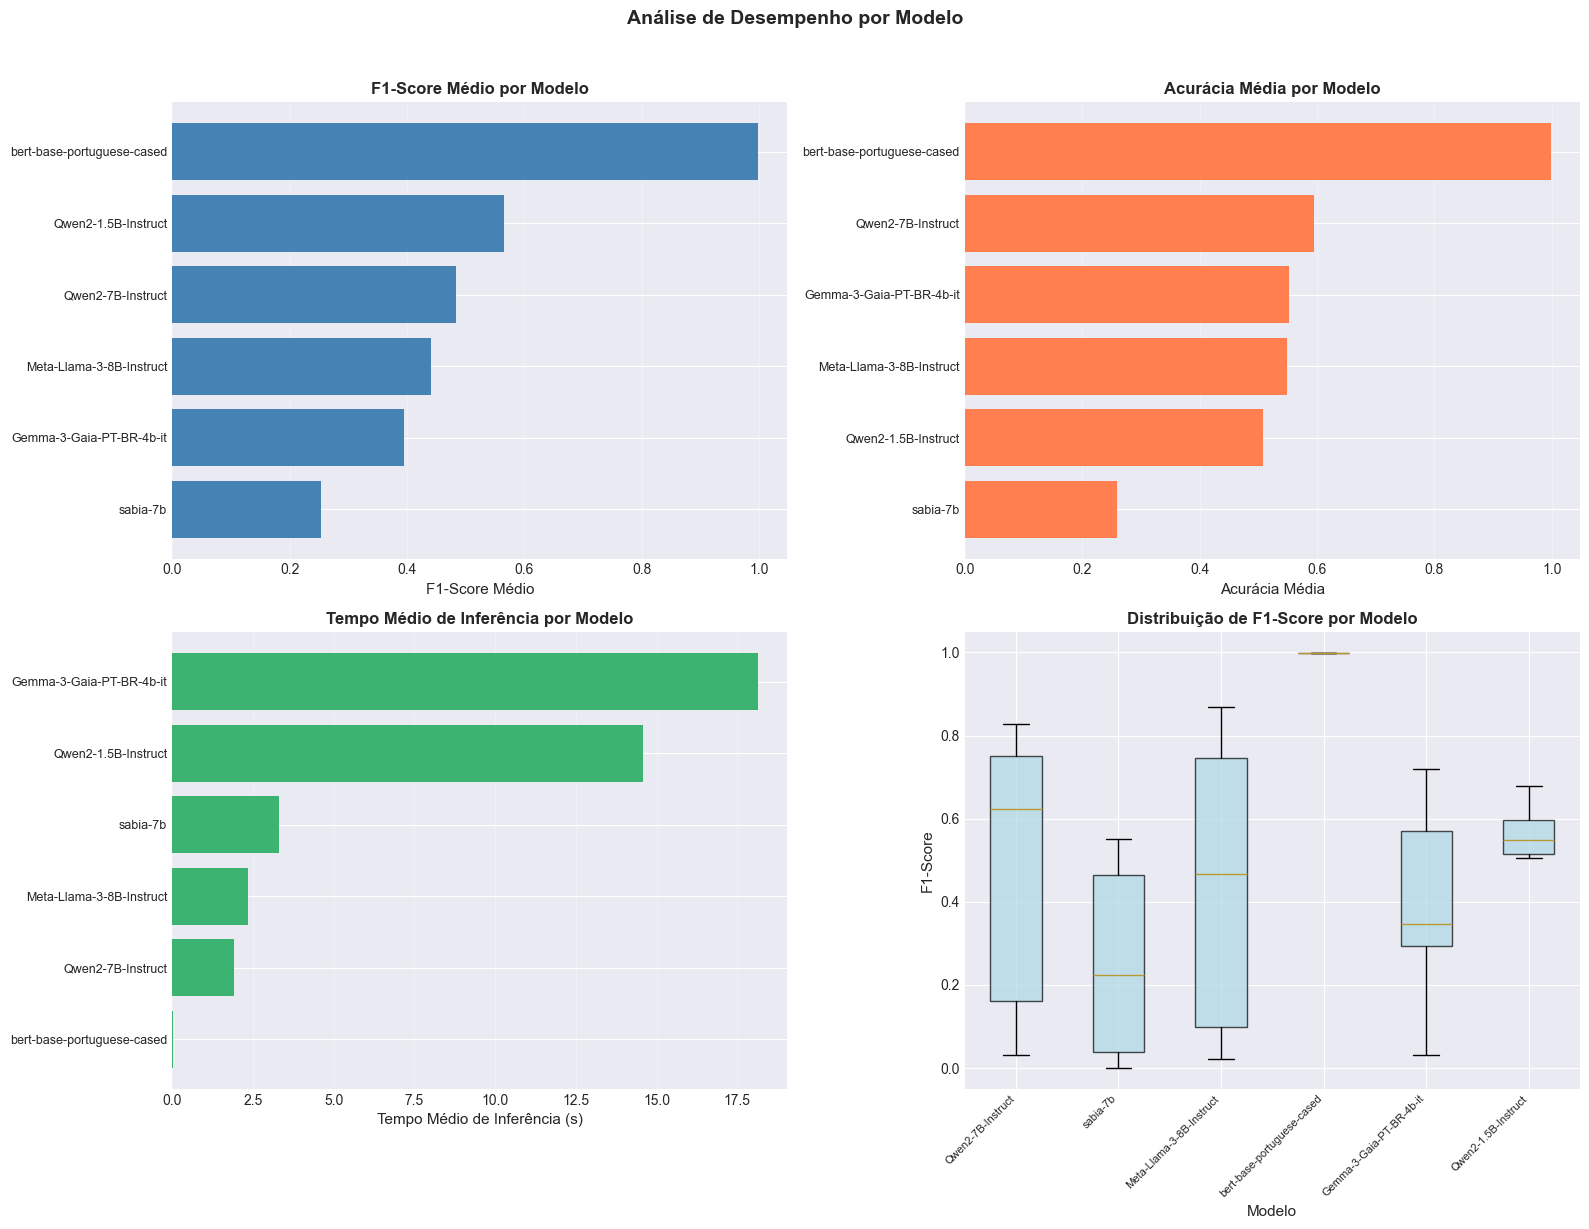

In [10]:
# Visualizações por Modelo
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. F1-Score por Modelo
model_f1 = df_report.groupby('model')['f1_score'].mean().sort_values(ascending=True)
axes[0, 0].barh(range(len(model_f1)), model_f1.values, color='steelblue')
axes[0, 0].set_yticks(range(len(model_f1)))
axes[0, 0].set_yticklabels([m.split('/')[-1] for m in model_f1.index], fontsize=9)
axes[0, 0].set_xlabel('F1-Score Médio', fontsize=11)
axes[0, 0].set_title('F1-Score Médio por Modelo', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Acurácia por Modelo
model_acc = df_report.groupby('model')['accuracy'].mean().sort_values(ascending=True)
axes[0, 1].barh(range(len(model_acc)), model_acc.values, color='coral')
axes[0, 1].set_yticks(range(len(model_acc)))
axes[0, 1].set_yticklabels([m.split('/')[-1] for m in model_acc.index], fontsize=9)
axes[0, 1].set_xlabel('Acurácia Média', fontsize=11)
axes[0, 1].set_title('Acurácia Média por Modelo', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Tempo de Inferência por Modelo
model_time = df_report.groupby('model')['avg_inference_time'].mean().sort_values(ascending=True)
axes[1, 0].barh(range(len(model_time)), model_time.values, color='mediumseagreen')
axes[1, 0].set_yticks(range(len(model_time)))
axes[1, 0].set_yticklabels([m.split('/')[-1] for m in model_time.index], fontsize=9)
axes[1, 0].set_xlabel('Tempo Médio de Inferência (s)', fontsize=11)
axes[1, 0].set_title('Tempo Médio de Inferência por Modelo', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Boxplot de F1-Score por Modelo
model_groups = [df_report[df_report['model'] == model]['f1_score'].values for model in df_report['model'].unique()]
bp = axes[1, 1].boxplot(model_groups, patch_artist=True, labels=[m.split('/')[-1] for m in df_report['model'].unique()])
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)
axes[1, 1].set_title('Distribuição de F1-Score por Modelo', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Modelo', fontsize=11)
axes[1, 1].set_ylabel('F1-Score', fontsize=11)
axes[1, 1].tick_params(axis='x', labelsize=8)
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.suptitle('Análise de Desempenho por Modelo', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4.3. Visualizações por Estratégia

/var/folders/t0/m4xksm1s4yx4mmk0g0430wgc0000gn/T/ipykernel_63882/111952206.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 1].boxplot(strategy_groups, patch_artist=True, labels=[s.replace('_', ' ').title() for s in df_report['strategy'].unique()])


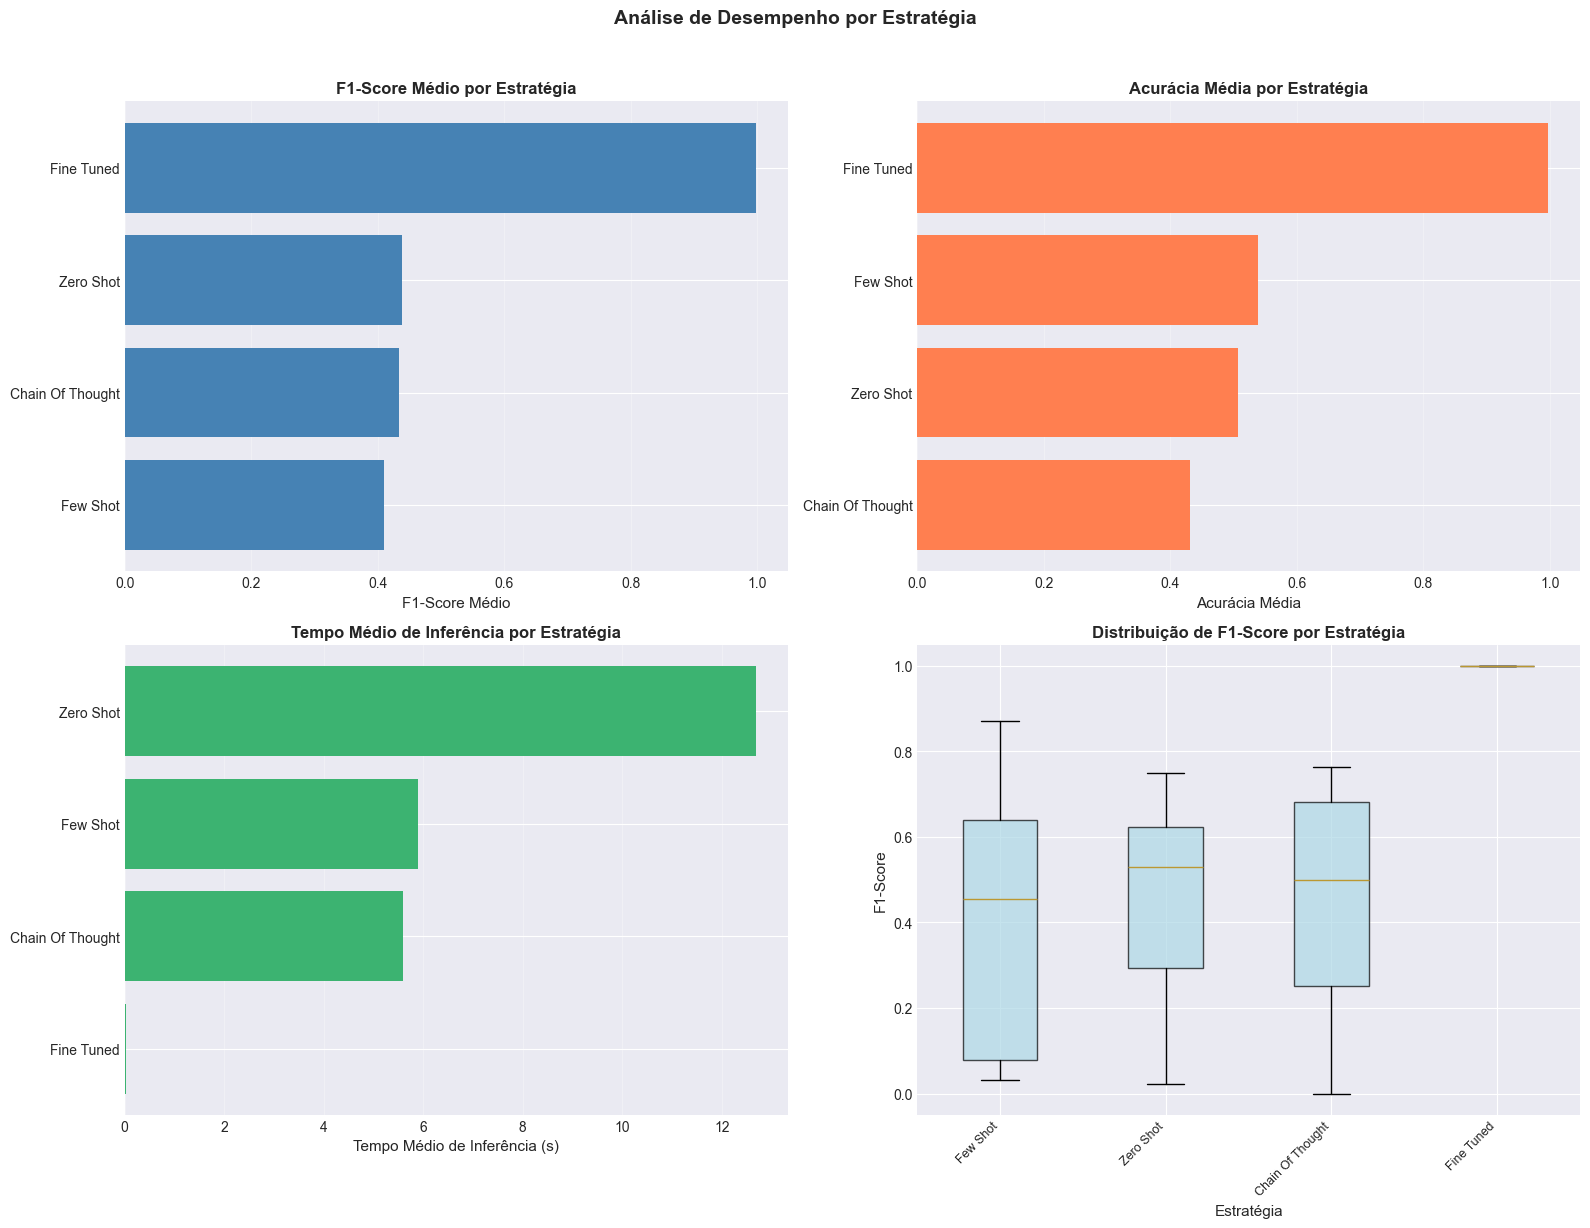

In [11]:
# Visualizações por Estratégia
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. F1-Score por Estratégia
strategy_f1 = df_report.groupby('strategy')['f1_score'].mean().sort_values(ascending=True)
axes[0, 0].barh(range(len(strategy_f1)), strategy_f1.values, color='steelblue')
axes[0, 0].set_yticks(range(len(strategy_f1)))
axes[0, 0].set_yticklabels([s.replace('_', ' ').title() for s in strategy_f1.index], fontsize=10)
axes[0, 0].set_xlabel('F1-Score Médio', fontsize=11)
axes[0, 0].set_title('F1-Score Médio por Estratégia', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Acurácia por Estratégia
strategy_acc = df_report.groupby('strategy')['accuracy'].mean().sort_values(ascending=True)
axes[0, 1].barh(range(len(strategy_acc)), strategy_acc.values, color='coral')
axes[0, 1].set_yticks(range(len(strategy_acc)))
axes[0, 1].set_yticklabels([s.replace('_', ' ').title() for s in strategy_acc.index], fontsize=10)
axes[0, 1].set_xlabel('Acurácia Média', fontsize=11)
axes[0, 1].set_title('Acurácia Média por Estratégia', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Tempo de Inferência por Estratégia
strategy_time = df_report.groupby('strategy')['avg_inference_time'].mean().sort_values(ascending=True)
axes[1, 0].barh(range(len(strategy_time)), strategy_time.values, color='mediumseagreen')
axes[1, 0].set_yticks(range(len(strategy_time)))
axes[1, 0].set_yticklabels([s.replace('_', ' ').title() for s in strategy_time.index], fontsize=10)
axes[1, 0].set_xlabel('Tempo Médio de Inferência (s)', fontsize=11)
axes[1, 0].set_title('Tempo Médio de Inferência por Estratégia', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Boxplot de F1-Score por Estratégia
strategy_groups = [df_report[df_report['strategy'] == strategy]['f1_score'].values for strategy in df_report['strategy'].unique()]
bp = axes[1, 1].boxplot(strategy_groups, patch_artist=True, labels=[s.replace('_', ' ').title() for s in df_report['strategy'].unique()])
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)
axes[1, 1].set_title('Distribuição de F1-Score por Estratégia', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Estratégia', fontsize=11)
axes[1, 1].set_ylabel('F1-Score', fontsize=11)
axes[1, 1].tick_params(axis='x', labelsize=9)
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.suptitle('Análise de Desempenho por Estratégia', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4.4. Visualizações por Dataset

/var/folders/t0/m4xksm1s4yx4mmk0g0430wgc0000gn/T/ipykernel_63882/2462444333.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 1].boxplot(dataset_groups, patch_artist=True, labels=[d.title() for d in df_report['dataset'].unique()])


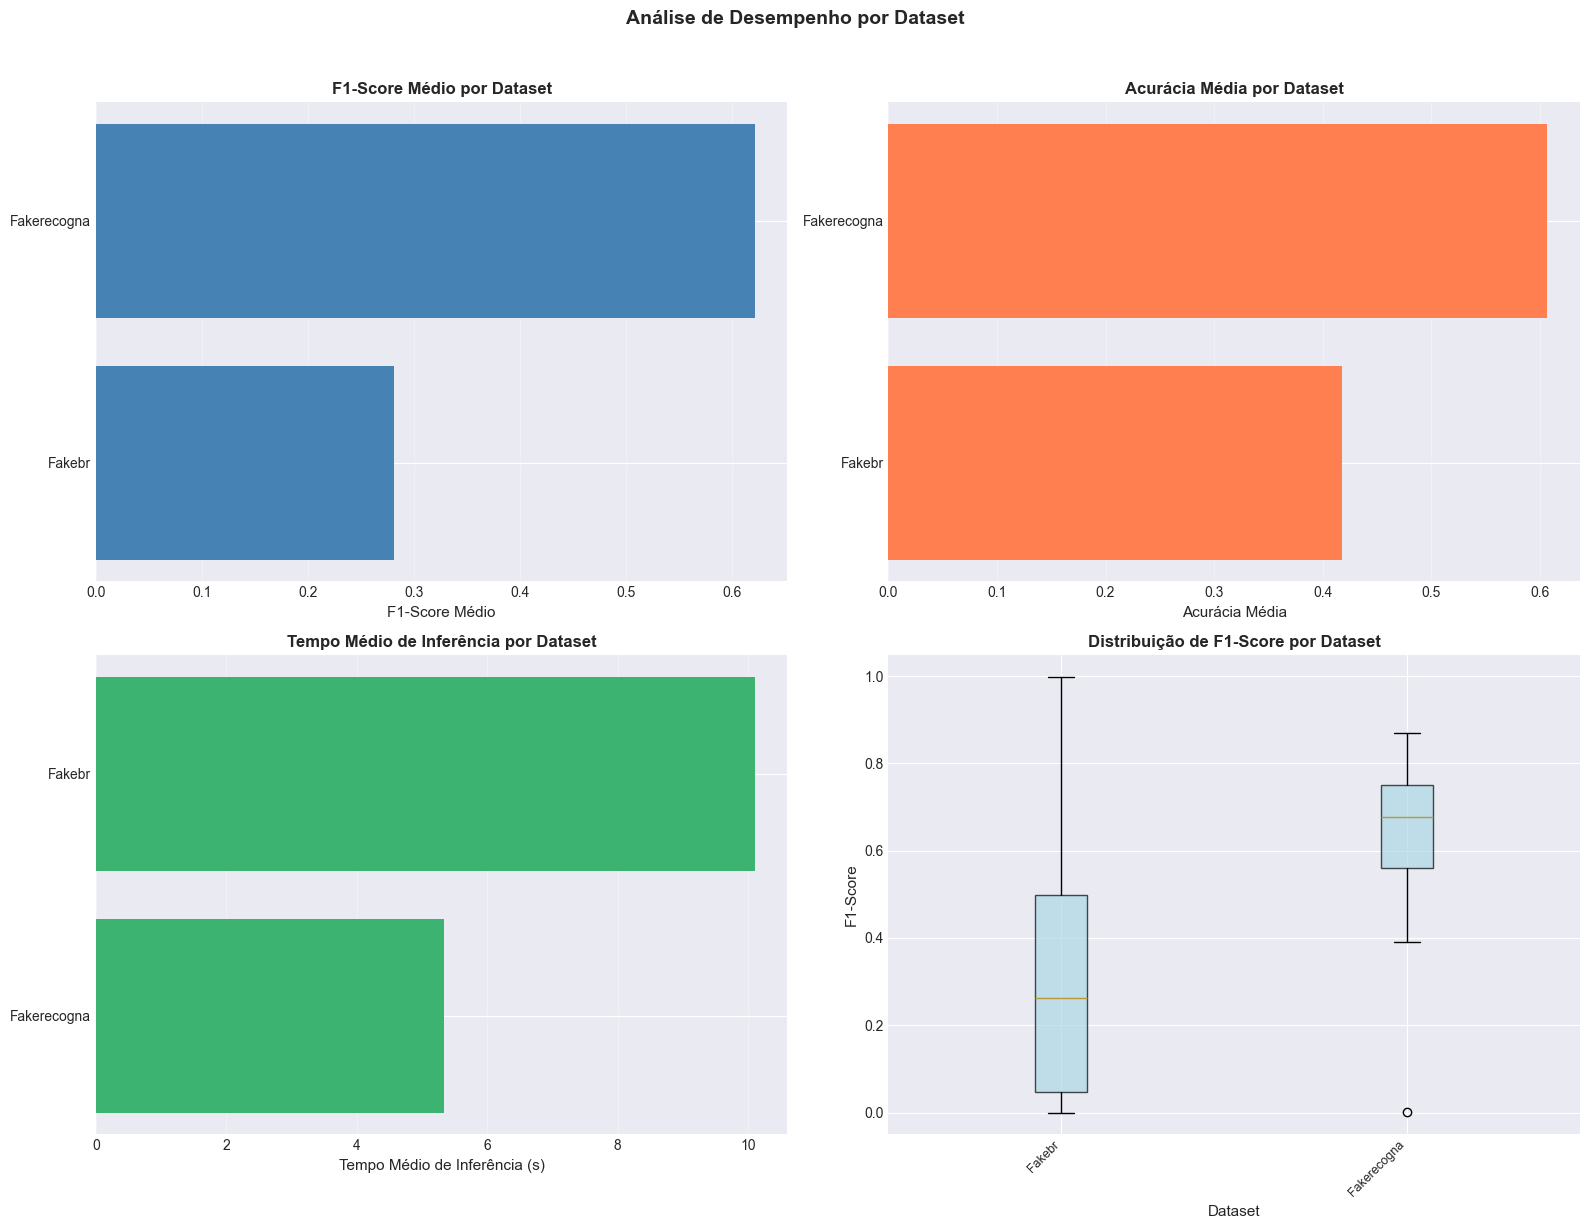

In [12]:
# Visualizações por Dataset
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. F1-Score por Dataset
dataset_f1 = df_report.groupby('dataset')['f1_score'].mean().sort_values(ascending=True)
axes[0, 0].barh(range(len(dataset_f1)), dataset_f1.values, color='steelblue')
axes[0, 0].set_yticks(range(len(dataset_f1)))
axes[0, 0].set_yticklabels([d.title() for d in dataset_f1.index], fontsize=10)
axes[0, 0].set_xlabel('F1-Score Médio', fontsize=11)
axes[0, 0].set_title('F1-Score Médio por Dataset', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Acurácia por Dataset
dataset_acc = df_report.groupby('dataset')['accuracy'].mean().sort_values(ascending=True)
axes[0, 1].barh(range(len(dataset_acc)), dataset_acc.values, color='coral')
axes[0, 1].set_yticks(range(len(dataset_acc)))
axes[0, 1].set_yticklabels([d.title() for d in dataset_acc.index], fontsize=10)
axes[0, 1].set_xlabel('Acurácia Média', fontsize=11)
axes[0, 1].set_title('Acurácia Média por Dataset', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Tempo de Inferência por Dataset
dataset_time = df_report.groupby('dataset')['avg_inference_time'].mean().sort_values(ascending=True)
axes[1, 0].barh(range(len(dataset_time)), dataset_time.values, color='mediumseagreen')
axes[1, 0].set_yticks(range(len(dataset_time)))
axes[1, 0].set_yticklabels([d.title() for d in dataset_time.index], fontsize=10)
axes[1, 0].set_xlabel('Tempo Médio de Inferência (s)', fontsize=11)
axes[1, 0].set_title('Tempo Médio de Inferência por Dataset', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Boxplot de F1-Score por Dataset
dataset_groups = [df_report[df_report['dataset'] == dataset]['f1_score'].values for dataset in df_report['dataset'].unique()]
bp = axes[1, 1].boxplot(dataset_groups, patch_artist=True, labels=[d.title() for d in df_report['dataset'].unique()])
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)
axes[1, 1].set_title('Distribuição de F1-Score por Dataset', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Dataset', fontsize=11)
axes[1, 1].set_ylabel('F1-Score', fontsize=11)
axes[1, 1].tick_params(axis='x', labelsize=9)
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.suptitle('Análise de Desempenho por Dataset', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4.5. Visualizações por Número de Parâmetros

/var/folders/t0/m4xksm1s4yx4mmk0g0430wgc0000gn/T/ipykernel_63882/1364586311.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  param_f1 = df_params.groupby('param_range')['f1_score'].mean().sort_values(ascending=True)


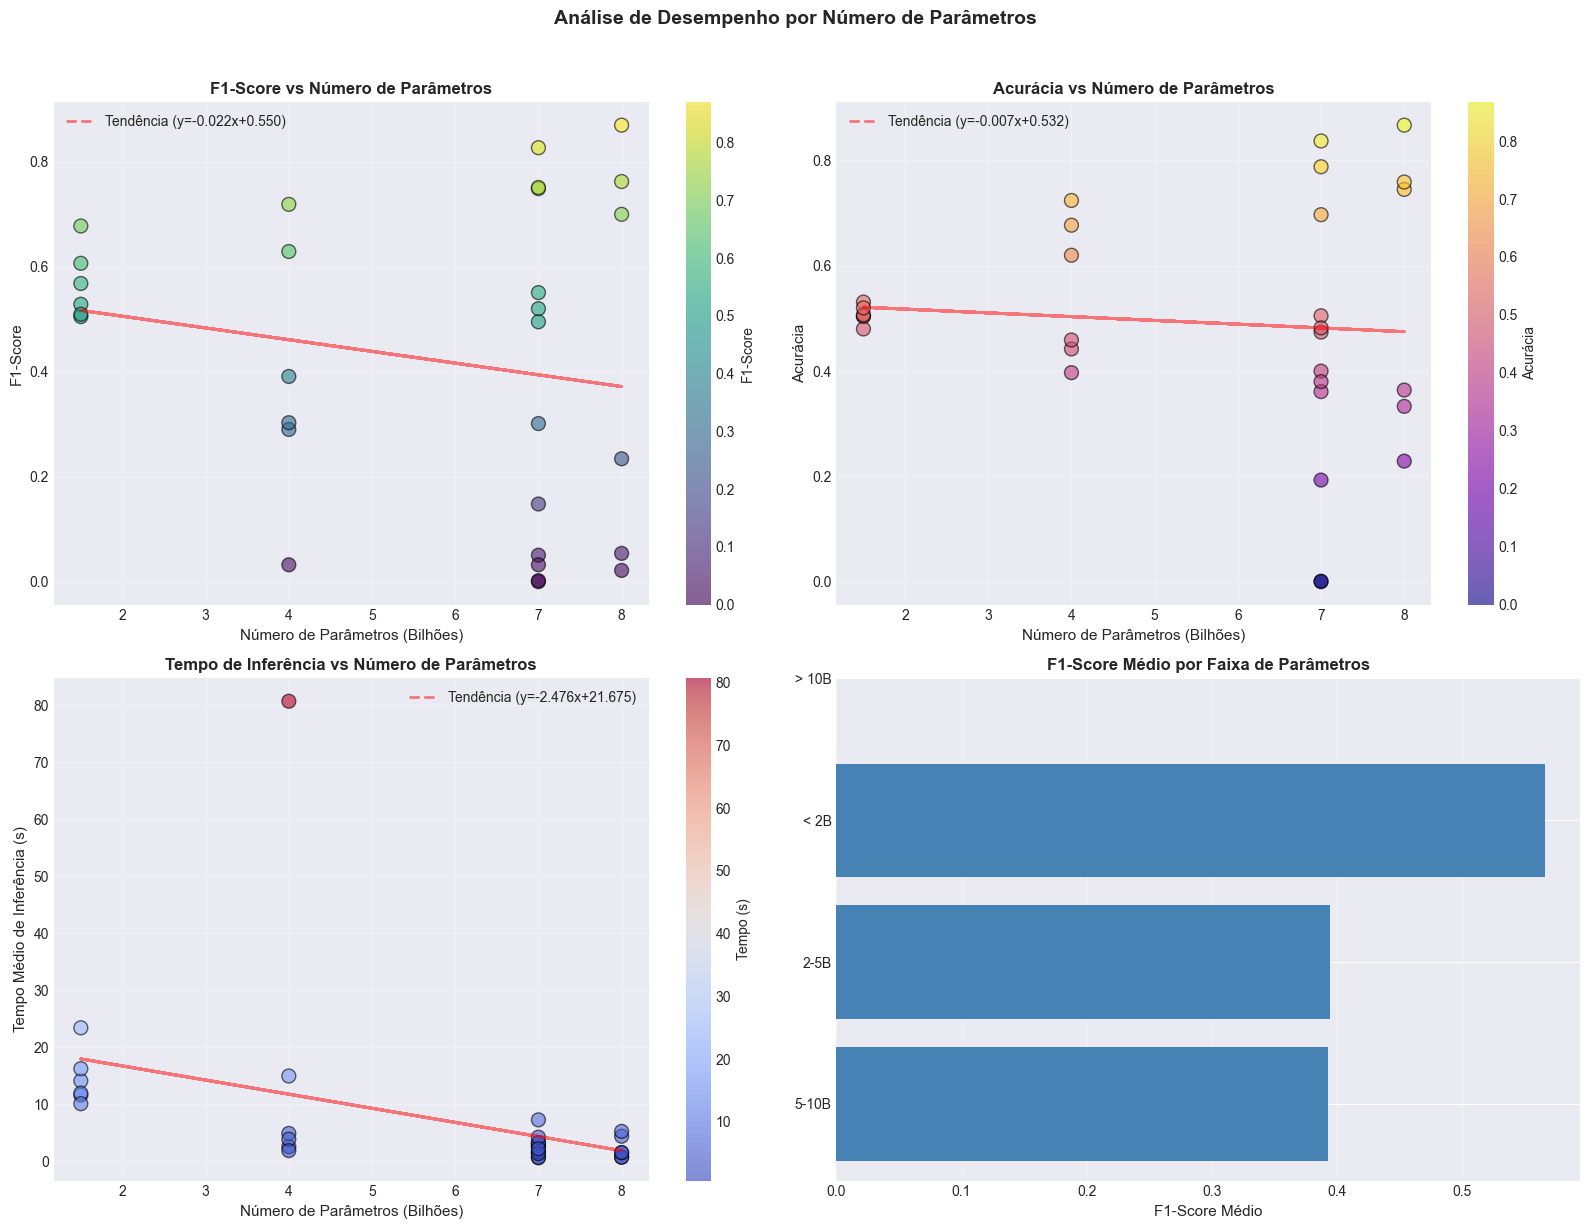

In [13]:
# Filtrar apenas resultados com número de parâmetros conhecido
df_params = df_report[df_report['num_parameters'].notna()].copy()

if len(df_params) > 0:
    # Visualizações por Número de Parâmetros
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Scatter: F1-Score vs Número de Parâmetros
    scatter = axes[0, 0].scatter(df_params['num_parameters'], df_params['f1_score'], 
                                  c=df_params['f1_score'], cmap='viridis', 
                                  s=100, alpha=0.6, edgecolors='black', linewidth=1)
    axes[0, 0].set_xlabel('Número de Parâmetros (Bilhões)', fontsize=11)
    axes[0, 0].set_ylabel('F1-Score', fontsize=11)
    axes[0, 0].set_title('F1-Score vs Número de Parâmetros', fontsize=12, fontweight='bold')
    axes[0, 0].grid(alpha=0.3)
    plt.colorbar(scatter, ax=axes[0, 0], label='F1-Score')
    
    # Adicionar linha de tendência
    z = np.polyfit(df_params['num_parameters'], df_params['f1_score'], 1)
    p = np.poly1d(z)
    axes[0, 0].plot(df_params['num_parameters'], p(df_params['num_parameters']), 
                    "r--", alpha=0.5, linewidth=2, label=f'Tendência (y={z[0]:.3f}x+{z[1]:.3f})')
    axes[0, 0].legend()
    
    # 2. Scatter: Acurácia vs Número de Parâmetros
    scatter2 = axes[0, 1].scatter(df_params['num_parameters'], df_params['accuracy'], 
                                  c=df_params['accuracy'], cmap='plasma', 
                                  s=100, alpha=0.6, edgecolors='black', linewidth=1)
    axes[0, 1].set_xlabel('Número de Parâmetros (Bilhões)', fontsize=11)
    axes[0, 1].set_ylabel('Acurácia', fontsize=11)
    axes[0, 1].set_title('Acurácia vs Número de Parâmetros', fontsize=12, fontweight='bold')
    axes[0, 1].grid(alpha=0.3)
    plt.colorbar(scatter2, ax=axes[0, 1], label='Acurácia')
    
    # Adicionar linha de tendência
    z2 = np.polyfit(df_params['num_parameters'], df_params['accuracy'], 1)
    p2 = np.poly1d(z2)
    axes[0, 1].plot(df_params['num_parameters'], p2(df_params['num_parameters']), 
                    "r--", alpha=0.5, linewidth=2, label=f'Tendência (y={z2[0]:.3f}x+{z2[1]:.3f})')
    axes[0, 1].legend()
    
    # 3. Scatter: Tempo de Inferência vs Número de Parâmetros
    scatter3 = axes[1, 0].scatter(df_params['num_parameters'], df_params['avg_inference_time'], 
                                  c=df_params['avg_inference_time'], cmap='coolwarm', 
                                  s=100, alpha=0.6, edgecolors='black', linewidth=1)
    axes[1, 0].set_xlabel('Número de Parâmetros (Bilhões)', fontsize=11)
    axes[1, 0].set_ylabel('Tempo Médio de Inferência (s)', fontsize=11)
    axes[1, 0].set_title('Tempo de Inferência vs Número de Parâmetros', fontsize=12, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)
    plt.colorbar(scatter3, ax=axes[1, 0], label='Tempo (s)')
    
    # Adicionar linha de tendência
    z3 = np.polyfit(df_params['num_parameters'], df_params['avg_inference_time'], 1)
    p3 = np.poly1d(z3)
    axes[1, 0].plot(df_params['num_parameters'], p3(df_params['num_parameters']), 
                    "r--", alpha=0.5, linewidth=2, label=f'Tendência (y={z3[0]:.3f}x+{z3[1]:.3f})')
    axes[1, 0].legend()
    
    # 4. Média de F1-Score agrupado por faixa de parâmetros
    df_params['param_range'] = pd.cut(df_params['num_parameters'], 
                                       bins=[0, 2, 5, 10, float('inf')],
                                       labels=['< 2B', '2-5B', '5-10B', '> 10B'])
    param_f1 = df_params.groupby('param_range')['f1_score'].mean().sort_values(ascending=True)
    axes[1, 1].barh(range(len(param_f1)), param_f1.values, color='steelblue')
    axes[1, 1].set_yticks(range(len(param_f1)))
    axes[1, 1].set_yticklabels(param_f1.index, fontsize=10)
    axes[1, 1].set_xlabel('F1-Score Médio', fontsize=11)
    axes[1, 1].set_title('F1-Score Médio por Faixa de Parâmetros', fontsize=12, fontweight='bold')
    axes[1, 1].grid(axis='x', alpha=0.3)
    
    plt.suptitle('Análise de Desempenho por Número de Parâmetros', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    logger.warning("⚠️ Não foi possível extrair número de parâmetros dos nomes dos modelos.")
    logger.info("   Adicione informações de parâmetros manualmente ou ajuste a função extract_parameters.")

### 4.6. Visualização Combinada: Heatmap de Desempenho

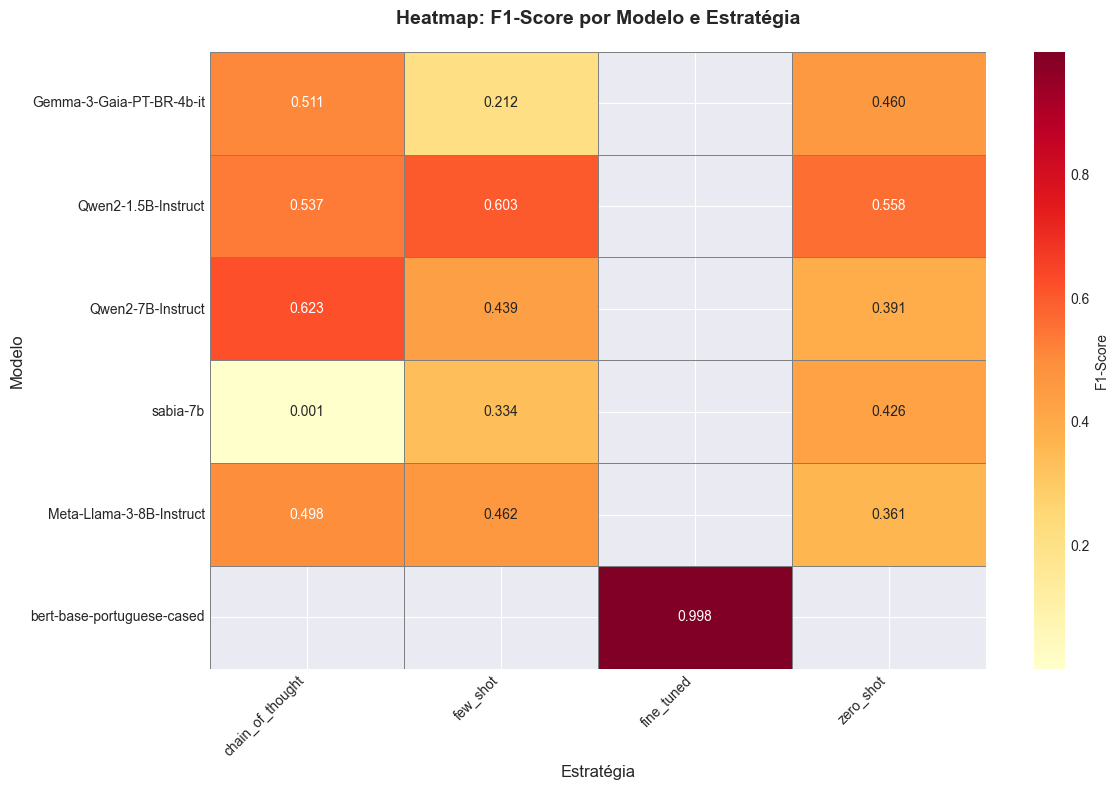

In [14]:
# Heatmap: F1-Score por Modelo e Estratégia
pivot_f1 = df_report.pivot_table(values='f1_score', index='model', columns='strategy', aggfunc='mean')
pivot_f1.index = [m.split('/')[-1] for m in pivot_f1.index]  # Nomes curtos dos modelos

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot_f1, annot=True, fmt='.3f', cmap='YlOrRd', cbar_kws={'label': 'F1-Score'}, 
            linewidths=0.5, linecolor='gray', ax=ax)
ax.set_title('Heatmap: F1-Score por Modelo e Estratégia', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Estratégia', fontsize=12)
ax.set_ylabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

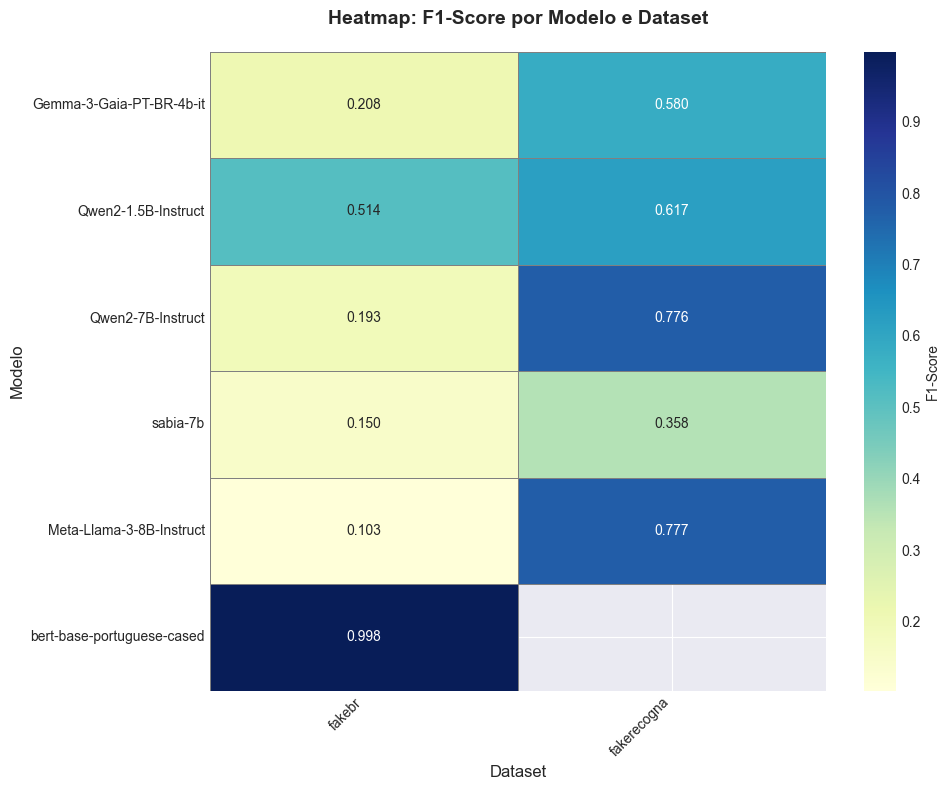

In [15]:
# Heatmap: F1-Score por Modelo e Dataset
pivot_f1_dataset = df_report.pivot_table(values='f1_score', index='model', columns='dataset', aggfunc='mean')
pivot_f1_dataset.index = [m.split('/')[-1] for m in pivot_f1_dataset.index]  # Nomes curtos dos modelos

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pivot_f1_dataset, annot=True, fmt='.3f', cmap='YlGnBu', cbar_kws={'label': 'F1-Score'}, 
            linewidths=0.5, linecolor='gray', ax=ax)
ax.set_title('Heatmap: F1-Score por Modelo e Dataset', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Conclusões

Documente suas conclusões aqui:
- Qual modelo teve melhor desempenho?
- Qual estratégia de prompting foi mais eficaz?
- Houve diferenças entre os datasets?
- Qual o trade-off entre desempenho e tempo de inferência?
- Existe correlação entre número de parâmetros e desempenho?